In [32]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Data Generation
===

In [33]:
np.random.seed(10)
p, q = (np.random.rand(i, 2) for i in (4, 5))
p_big, q_big = (np.random.rand(i, 80) for i in (100, 120))

print(p, "\n\n", q)

[[0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]] 

 [[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]]


Solution
===

In [47]:
def naive(p, q):
    ''' fill your code in here...
    '''
    d=np.zeros([p.shape[0],q.shape[0]])
    for i in range(p.shape[0]):
        for j in range(q.shape[0]):
            d[i,j] = np.sqrt(np.sum(np.square(p[i]-q[j])))
    return d

In [48]:
#Let's test our solution :
d_naive = naive(p,q)
print("Shape of p: ", p.shape[0], ", shape of q: ", q.shape[0], ", shape of d: ", d_naive.shape)

Shape of p:  4 , shape of q:  5 , shape of d:  (4, 5)


### Use matching indices

Instead of iterating through indices, one can use them directly to parallelize the operations with Numpy.

In [49]:
rows, cols = np.indices((p.shape[0], q.shape[0]))
print(rows, end='\n\n')
print(cols)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


In [50]:
print(p[rows.ravel()], end='\n\n')
print(q[cols.ravel()])

[[0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]]

[[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607

In [52]:
def with_indices(p, q):
    ''' fill your code in here...
    '''
    rows, cols = np.indices((p.shape[0], q.shape[0]))
    d = np.sqrt(np.sum(np.square(p[rows.ravel(),:] - q[cols.ravel(),:]), axis=1))
    return d.reshape(p.shape[0], q.shape[0])

In [53]:
#Let's test our solution :
d_indices = with_indices(p,q)
print("Shape of p: ", p.shape[0], ", shape of q: ", q.shape[0], ", shape of d: ", d_indices.shape)

Shape of p:  4 , shape of q:  5 , shape of d:  (4, 5)


In [54]:
np.testing.assert_allclose(d_indices, d_naive)

### Use a library

`scipy` is the equivalent of matlab toolboxes and have a lot to offer. Actually the pairwise computation is part of the library through the `spatial` module.

In [55]:
from scipy.spatial.distance import cdist

def scipy_version(p, q):
    return cdist(p, q)

### Numpy Magic

In [56]:
def tensor_broadcasting(p, q):
    return np.sqrt(np.sum((p[:,np.newaxis,:]-q[np.newaxis,:,:])**2, axis=2))

In [57]:
#Let's test the methods
d_tensor = tensor_broadcasting(p, q)
d_scipy = scipy_version(p, q)
np.testing.assert_allclose(d_naive, d_tensor)
np.testing.assert_allclose(d_naive, d_scipy)

# Compare methods

In [58]:
methods = [naive, with_indices, scipy_version, tensor_broadcasting]
timers = []
for f in methods:
    r = %timeit -o f(p_big, q_big)
    timers.append(r)

308 ms ± 57.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
27.8 ms ± 5.89 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.57 ms ± 24.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
12.9 ms ± 169 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


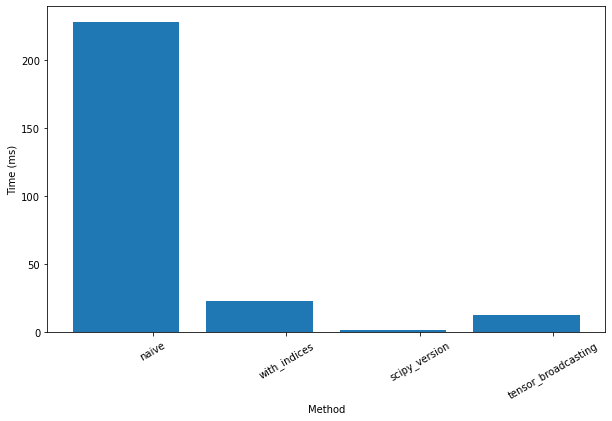

In [59]:
plt.figure(figsize=(10,6))
plt.bar(np.arange(len(methods)), [r.best*1000 for r in timers], log=False)  # Set log to True for logarithmic scale
plt.xticks(np.arange(len(methods))+0.2, [f.__name__ for f in methods], rotation=30)
plt.xlabel('Method')
plt.ylabel('Time (ms)')
plt.show()